In [1]:
# this script calculates the topic distribution of single funded paper and cofunded paper

In [1]:
import pandas as pd
import numpy as np
from itertools import product
from ast import literal_eval
import seaborn as sns
import random
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
pubs_path="../../data/nf_folder/Data/DerivedData/CleanedRawData/pubs_author_funder.csv"

In [3]:
code2name_path="../../data/nf_folder/Data/RawData/discipline_code.csv"
name2level_path="../../data/nf_folder/Data/AdditionalData/discipline_classification.csv"

In [4]:
code2name=pd.read_csv(code2name_path)
code2name.columns=['dis','disname']
code2name.head(2)

,dis,disname
0,1,Agricult & Food Science
1,2,Botany


In [5]:
name2level=pd.read_csv(name2level_path)
name2level = name2level[['level_1','level_3']]
name2level.columns=['disname','dislevel']
name2level.head(2)

,disname,dislevel
0,Fine Arts & Architecture,Arts and Humanities
1,Performing Arts,Arts and Humanities


In [6]:
paf = pd.read_csv(pubs_path)
paf['author_country'] = paf['author_country'].apply(literal_eval)
paf['funder_country'] = paf['funder_country'].apply(
    lambda x: literal_eval(x) if pd.notnull(x) else "Not-Funded")
paf.head()

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,author_country,funder_country,discipline,year,rel_citation,citation
0,30507292,[Turkey],[Turkey],77,2009,0.485,6
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9
2,30574691,[Russia],[Russia],83,2009,0.312,4
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3


In [7]:
paf['authors']=paf['author_country'].apply(lambda x: list(set(x)))
paf['funders']=paf['funder_country'].apply(lambda x: list(set(x)) if x!='Not-Funded' else x)

In [8]:
res=[]
fdf = paf[paf.funders!='Not-Funded']
for ind,row in fdf.iterrows():
    dis=row['discipline']
    year=row['year']
    fs=row['funders']
    n=len(fs)
    for c in fs:
        p=1/n
        res.append([c,dis,year,p])               

In [9]:
res_df=pd.DataFrame(res,columns=['cntry','dis','year','prop'])
res_df.head()

,cntry,dis,year,prop
0,Turkey,77,2009,1.0
1,United States,83,2009,1.0
2,Russia,83,2009,1.0
3,Spain,89,2009,1.0
4,Spain,89,2009,1.0


In [10]:
res_df['type']=res_df['prop'].apply(lambda x:"s" if x==1 else "c")

In [11]:
res_df=res_df.groupby(['cntry','year','dis','type'])['prop'].sum().reset_index()
res_df.head()

,cntry,year,dis,type,prop
0,Afghanistan,2010,66,s,1.000000
1,Afghanistan,2011,47,c,0.333333
2,Afghanistan,2012,47,c,0.333333
3,Afghanistan,2015,22,c,0.076923
4,Afghanistan,2015,69,c,0.076923


In [12]:
dismeta=code2name.merge(name2level,on='disname')
dismeta.head()

,dis,disname,dislevel
0,1,Agricult & Food Science,Natural Sciences
1,2,Botany,Natural Sciences
2,3,Dairy & Animal Science,Natural Sciences
3,4,Ecology,Natural Sciences
4,5,Entomology,Natural Sciences


In [13]:
disnsp=pd.read_csv("leiden_full_1973-2017.csv",sep='\t',names=['disname','level'])
dismeta=dismeta.merge(disnsp,on='disname')

In [15]:
dismeta.head()

,dis,disname,dislevel,level
0,1,Agricult & Food Science,Natural Sciences,NM
1,2,Botany,Natural Sciences,NM
2,3,Dairy & Animal Science,Natural Sciences,NM
3,4,Ecology,Natural Sciences,NM
4,5,Entomology,Natural Sciences,NM


In [16]:
res_df=res_df.merge(dismeta,on='dis')

In [17]:
res_df.head()

,cntry,year,dis,type,prop,disname,dislevel,level
0,Afghanistan,2010,66,s,1.0,Veterinary Medicine,Medical Sciences,NM
1,Algeria,2012,66,c,0.5,Veterinary Medicine,Medical Sciences,NM
2,Algeria,2015,66,s,2.0,Veterinary Medicine,Medical Sciences,NM
3,Algeria,2017,66,s,1.0,Veterinary Medicine,Medical Sciences,NM
4,Algeria,2018,66,c,0.5,Veterinary Medicine,Medical Sciences,NM


In [49]:
test1=res_df.groupby(['cntry','level','type'])['prop'].sum().reset_index()
test1.head()

,cntry,level,type,prop
0,Afghanistan,NM,c,2.258202
1,Afghanistan,NM,s,1.000000
2,Albania,NE,s,1.000000
3,Albania,NM,c,5.466667
4,Albania,NM,s,7.000000


In [50]:
test1 = test1.pivot_table(index=['cntry','type'],columns='level',values='prop')

In [51]:
test1=test1.fillna(0)

In [52]:
test1.head()

level                     NE         NM   SHM
cntry       type                             
Afghanistan c       0.000000   2.258202   0.0
            s       0.000000   1.000000   0.0
Albania     c       0.000000   5.466667   0.0
            s       1.000000   7.000000   6.0
Algeria     c     204.035557  88.233333  14.2

In [53]:
test1=test1.div(test1.sum(axis=1), axis=0)

In [54]:
test1=test1.reset_index()

In [55]:
domep=test1[test1.type=='s']
cofundp=test1[test1.type=='c']

In [56]:
cofundp.head()

level,cntry,type,NE,NM,SHM
0,Afghanistan,c,0.000000,1.000000,0.000000
2,Albania,c,0.000000,1.000000,0.000000
4,Algeria,c,0.665763,0.287903,0.046334
6,Andorra,c,0.232258,0.658065,0.109677
8,Angola,c,0.150442,0.716814,0.132743


In [60]:
cntry='China'

In [61]:
cofundp[cofundp.cntry==cntry]

level,cntry,type,NE,NM,SHM
70,China,c,0.6013,0.275059,0.123641


In [62]:
domep[domep.cntry==cntry]

level,cntry,type,NE,NM,SHM
71,China,s,0.644579,0.243402,0.112018


In [69]:
topn=['United States','China','Japan','South Korea','Germany','United Kingdom','EU','India','Canada','Spain']

In [71]:
filter1 = test1[test1.cntry.isin(topn)]

In [84]:
filter1[filter1.type=='c']

level,cntry,type,NE,NM,SHM
62,Canada,c,0.388341,0.368330,0.243329
70,China,c,0.601300,0.275059,0.123641
94,EU,c,0.496473,0.322896,0.180631
124,Germany,c,0.485158,0.287744,0.227098
148,India,c,0.626160,0.272211,0.101629
166,Japan,c,0.462106,0.279815,0.258079
303,South Korea,c,0.626710,0.241628,0.131662
306,Spain,c,0.543551,0.317649,0.138800
346,United Kingdom,c,0.360746,0.364808,0.274446
348,United States,c,0.383092,0.341918,0.274990


In [63]:
import ternary

<AxesSubplot:title={'center':'Scatter Plot'}>

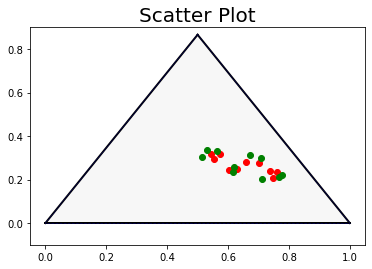

In [83]:
scale = 1
figure, tax = ternary.figure(scale=scale)
tax.set_title("Scatter Plot", fontsize=20)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=5, color="blue")
# Plot a few different styles with a legend

tax.scatter(filter1[filter1.type=='c'][['NE','NM','SHM']].values,color='red', label="Red Squares")
tax.scatter(filter1[filter1.type=='s'][['NE','NM','SHM']].values,color='green', label="Green Diamonds")

In [87]:
filter1.to_csv("top10_fund_profile.csv")